<a href="https://colab.research.google.com/github/tonyjung01/Machine-Learning/blob/main/3-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-최근접 이웃 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [3]:
import matplotlib.pyplot as plt

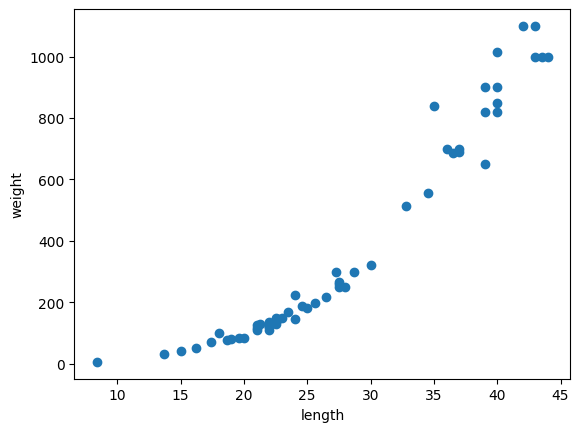

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

In [7]:
print(train_input.shape, test_input.shape)

(42,) (14,)


사이킷런에 사용하는 훈련 세트는 2차원 배열이어야 함. 특성이 2개면 바로 2차원 배열하면 되는데 아니면 reshape 사용

In [8]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [9]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [ ]:
# 아래 코드의 주석을 제거하고 실행하면 에러가 발생합니다
# test_array = test_array.reshape(2, 3)

지정한 크기가 원본 배열 원소 개수와 다르면 에러 발생

In [10]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

-1 넣으면 나머지 원소 개수로 모두 채움

In [11]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정 계수 ($ R^2$)

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [14]:
knr.score(test_input, test_target)

0.992809406101064

분류에서 점수는 샘플을 정확하게 분류한 개수의 비율, 즉 정확도임. 그러나 회귀는 정확한 숫자 맞추는 것이 거의 불가능하므로 결정계수 사용


결정계수 R^2 = 1 - (타깃-예측)^2의 합/(타깃-평균)^2의 합

예측이 타깃에 가까우면 결정계수는 1에 가까워짐

In [15]:
from sklearn.metrics import mean_absolute_error

In [16]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합 vs 과소적합

과대적합 -> 훈련에서는 점수 좋고 테스트에서 나쁨

과소적합 -> 훈련 세트보다 테스트 점수 높거나 두 점수 모두 낮음

In [17]:
print(knr.score(train_input, train_target))

0.9698823289099254


훈련 세트 점수보다 테스트 점수가 높으므로 과소적합 상태

In [18]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [19]:
print(knr.score(test_input, test_target))

0.9746459963987609


## 확인문제

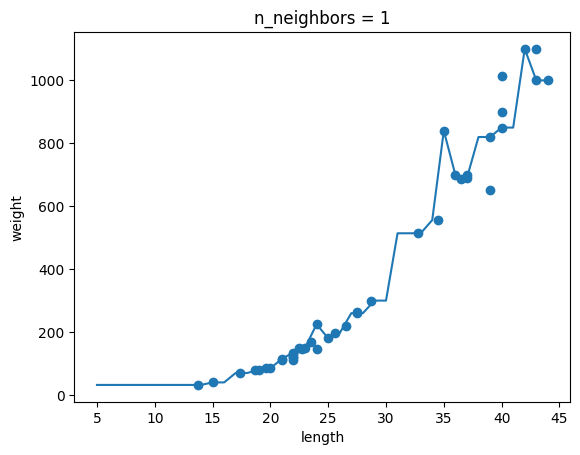

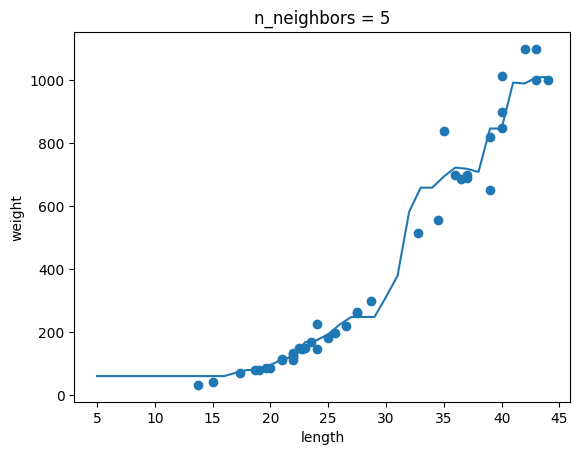

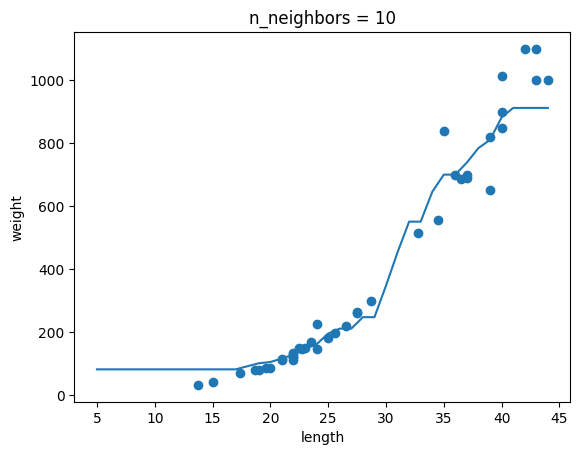

In [ ]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

n이 커짐에 따라 모델이 단순해짐